## 필요한 라이브러리 불러오기

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None 
pd.options.display.max_columns = None 

%matplotlib inline

## 1. food_order.xlsx 데이터 불러오기

In [39]:
food = pd.read_excel("data/food_order.xlsx")

## 2. diff라는 column 이름으로 ok column에서 bad column을 빼주세요

In [40]:
food['diff'] = food['ok'] - food['bad']

## 3. 2015년 4월 이후의 데이터만 뽑아와주세요

In [41]:
food.set_index('date', inplace=True)
food2 = food['2015-04':]
food2.head()

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday,diff
date,,,,,,,,,,,,,,,,
2015-04-01,dinner,noodle bar,돼지고기볶음&배추쌈,F,100,100,10,0,1,0,10,2015,4,1,2,1
2015-04-01,dinner,take out,스페셜유부초밥&취나물주먹밥,F,83,80,0,0,0,0,-3,2015,4,1,2,0
2015-04-01,dinner,after school,참깨라면,F,86,100,10,0,0,0,24,2015,4,1,2,0
2015-04-01,lunch,burger&pizza,불닭치즈리조또,F,136,200,30,0,0,0,94,2015,4,1,2,0
2015-04-01,breakfast,rice & soup 1,오징어무맑은국,F,54,60,20,0,0,0,26,2015,4,1,2,0


## 4. 아래와 같이 year, month corner dine_type별로 ok, bad, diff의 합을 구해주세요
### NaN의 값은 0으로 채워주세요

In [229]:
food3 = food2.groupby(['year', 'month', 'corner', 'dine_type'])[['ok', 'bad', 'diff']].sum().unstack(level=2).fillna(0)
food3

ok                                      \
corner               after school burger&pizza grill & fry noodle bar   
year month dine_type                                                    
2015 4     breakfast          0.0          0.0         0.0        0.0   
           dinner           244.0        295.0       389.0      176.0   
           lunch            483.0        530.0       901.0      833.0   
     5     breakfast          0.0          0.0         0.0        0.0   
           dinner           180.0        225.0       276.0      133.0   
           lunch            493.0        474.0       876.0      851.0   
     6     breakfast          0.0          0.0         0.0        0.0   
           dinner           212.0        229.0       396.0      121.0   
           lunch            554.0        612.0      1098.0     1048.0   
     7     breakfast          0.0          0.0         0.0        0.0   
           dinner           140.0        172.0       203.0       83.0   
           lunch            273.0        316.0       524.0      642.0   

                                                                   bad  \
corner               rice & soup 1 rice & soup 2 take out after school   
year month dine_type                                                     
2015 4     breakfast          48.0           0.0      1.0          0.0   
           dinner            392.0           0.0      5.0         58.0   
           lunch             774.0         719.0     14.0         91.0   
     5     breakfast          62.0           0.0      2.0          0.0   
           dinner            283.0           0.0      4.0         39.0   
           lunch             898.0         701.0     25.0         61.0   
     6     breakfast          85.0           0.0      2.0          0.0   
           dinner            284.0           0.0      4.0         40.0   
           lunch            1213.0         836.0     26.0        108.0   
     7     breakfast          50.0           0.0      0.0          0.0   
           dinner            206.0           0.0      3.0         40.0   
           lunch             599.0         470.0      9.0         54.0   

                                                                        \
corner               burger&pizza grill & fry noodle bar rice & soup 1   
year month dine_type                                                     
2015 4     breakfast          0.0         0.0        0.0          19.0   
           dinner            75.0        92.0       37.0         157.0   
           lunch            166.0       308.0      268.0         187.0   
     5     breakfast          0.0         0.0        0.0           7.0   
           dinner            36.0        60.0       23.0          75.0   
           lunch             83.0       161.0      269.0         143.0   
     6     breakfast          0.0         0.0        0.0          21.0   
           dinner            55.0       139.0       35.0          86.0   
           lunch            143.0       228.0      250.0         315.0   
     7     breakfast          0.0         0.0        0.0          35.0   
           dinner            41.0        73.0       31.0          95.0   
           lunch             82.0       207.0      238.0         110.0   

                                                    diff               \
corner               rice & soup 2 take out after school burger&pizza   
year month dine_type                                                    
2015 4     breakfast           0.0      0.0          0.0          0.0   
           dinner              0.0      4.0        186.0        220.0   
           lunch             142.0      7.0        392.0        364.0   
     5     breakfast           0.0      0.0          0.0          0.0   
           dinner              0.0      0.0        141.0        189.0   
           lunch             144.0      5.0        432.0        391.0   
     6     breakfast           0.0      0.0          0.0

## 5. 4번 데이터프레임에서 diff column에서
## 가로 축을 기준으로 순위를 매겨주세요
## ex) 2015년 4월 breakfast 값이 높은 순서대로 1, 2, 3 ...등 부여 값이 같을때는 동일 순위 부여 
### 구글링해서 rank()함수 사용 금지!!! 직접 본인이 코딩해보세요!!

In [209]:
food3['diff'].rank(axis=1, ascending=False, method='min')

corner                after school  burger&pizza  grill & fry  noodle bar  \
year month dine_type                                                        
2015 4     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               5.0           6.0          1.0         4.0   
     5     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               5.0           6.0          2.0         3.0   
     6     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               6.0           5.0          2.0         3.0   
     7     breakfast           2.0           2.0          2.0         2.0   
           dinner              4.0           1.0          2.0         5.0   
           lunch               6.0           5.0          4.0         2.0   

corner                rice & soup 1  rice & soup 2  take out  
year month dine_type                                          
2015 4     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                2.0            3.0       7.0  
     5     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                1.0            4.0       7.0  
     6     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                1.0            4.0       7.0  
     7     breakfast            1.0            2.0       2.0  
           dinner               3.0            7.0       6.0  
           lunch                1.0            3.0       7.0

In [230]:
for i in range(food3.shape[0]):
    dic = {}
    num = 1
    a = list(set(food3['diff'].iloc[i]))
    a.sort(reverse=True)
    for j in a:
        dic[j] = num
        num += 1

    food3['diff'].iloc[i] = [dic[x] for x in food3['diff'].iloc[i]]

food3['diff']

C:\Users\yyj94\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


corner                after school  burger&pizza  grill & fry  noodle bar  \
year month dine_type                                                        
2015 4     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               5.0           6.0          1.0         4.0   
     5     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               5.0           6.0          2.0         3.0   
     6     breakfast           3.0           3.0          3.0         3.0   
           dinner              4.0           3.0          1.0         5.0   
           lunch               6.0           5.0          2.0         3.0   
     7     breakfast           2.0           2.0          2.0         2.0   
           dinner              4.0           1.0          2.0         5.0   
           lunch               6.0           5.0          4.0         2.0   

corner                rice & soup 1  rice & soup 2  take out  
year month dine_type                                          
2015 4     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                2.0            3.0       7.0  
     5     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                1.0            4.0       7.0  
     6     breakfast            1.0            3.0       2.0  
           dinner               2.0            7.0       6.0  
           lunch                1.0            4.0       7.0  
     7     breakfast            1.0            2.0       2.0  
           dinner               3.0            7.0       6.0  
           lunch                1.0            3.0       7.0

## 6. 아래와 같은 line graph를 만들어 주세요

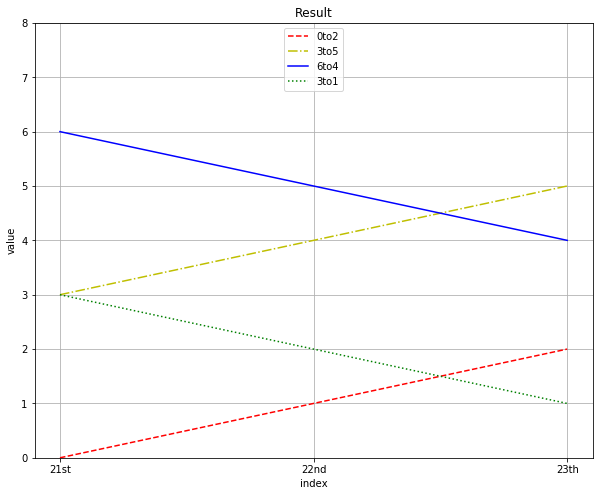

In [96]:
# 이미지 크기 변경
plt.figure(figsize=(10,8))

# plot 그리기
# plt.plot(["21st","22nd","23th"], [x for x in range(3)], 'c^--')
plt.plot(["21st","22nd","23th"], [x for x in range(3)], '--', color='red')
plt.plot(["21st","22nd","23th"], [x for x in range(3, 6)], 'y-.')
plt.plot(["21st","22nd","23th"], [x for x in range(6, 3, -1)], 'b-')
plt.plot(["21st","22nd","23th"], [x for x in range(3, 0, -1)], 'g:')

# x축 이름 지정
plt.xlabel('index')

# y축 이름 지정
plt.ylabel('value')

# 제목 지정
plt.title('Result')

# 범례 추가
# upper, center, lower / left, center, right
plt.legend(['0to2', '3to5', '6to4', '3to1'], loc='upper center')

# 축값 변경
plt.ylim(0, 8)

# grid 표사
plt.grid(True)

plt.show()

## 7. 각 corner마다 year별로 use_count의 합을 시각화해주세요 

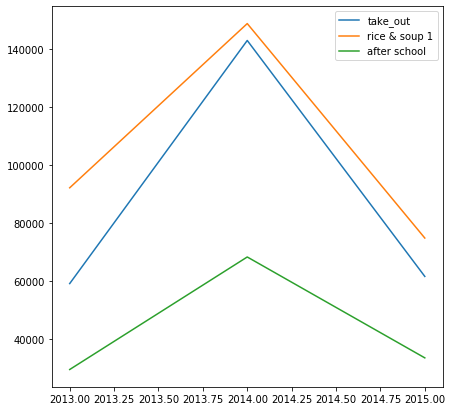

In [163]:
plt.figure(figsize=(7,7))
a = food.pivot_table(index=['year'], columns='corner', aggfunc='sum', values='use_count')
plt.plot(a['take out'])
plt.plot(a['rice & soup 1'])
plt.plot(a['after school'])

# plt.xticks(np.arange(2013, 2016, step=1))

plt.legend(['take_out', 'rice & soup 1', 'after school'])